In [1]:
#Import the required libraries
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory=False)

## Understand the dataset

In [3]:
#1 Understand the dataset
#  1. Identify the shape of the dataset
df.shape

(364558, 53)

In [4]:
#  2. Identify variables with null values and also count of the null values for each variable

ser_colName_hasNull = df.isnull().sum()
for colName, countNullValues in ser_colName_hasNull.items():
    if countNullValues > 0:
        print(colName, "       ", countNullValues)

Closed Date         2381
Descriptor         6501
Location Type         133
Incident Zip         2998
Incident Address         51699
Street Name         51699
Cross Street 1         57188
Cross Street 2         57805
Intersection Street 1         313438
Intersection Street 2         314046
Address Type         3252
City         2997
Landmark         364183
Facility Type         2389
Due Date         3
Resolution Action Updated Date         2402
X Coordinate (State Plane)         4030
Y Coordinate (State Plane)         4030
School Region         1
School Code         1
School Zip         1
School or Citywide Complaint         364558
Vehicle Type         364558
Taxi Company Borough         364558
Taxi Pick Up Location         364558
Bridge Highway Name         364261
Bridge Highway Direction         364261
Road Ramp         364296
Bridge Highway Segment         364296
Garage Lot Name         364558
Ferry Direction         364557
Ferry Terminal Name         364556
Latitude         4030
Lon

## Missing Values Treatment

In [5]:
#Missing Values Treatment
# 1. Dropping columns where majority of data is missing

df.drop(['Intersection Street 1', 'Intersection Street 2', 'Landmark', 'School or Citywide Complaint',
        'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
        'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 
        'Ferry Direction', 'Ferry Terminal Name'], axis = 1, inplace =True)

In [6]:
#Missing Value Treatment
# 2. Dropping rows where city is missing since city is a parameter we are using in analysis

df.drop(df[df['City'].isnull()].index, inplace = True)

# 3. Dropping rows where location is missing as we will use ot for plots

df.drop(df[df['Location'].isnull()].index, inplace = True)

#4. Dropping rows where Closed Date is missing since it will be used to compute response time
df.drop(df[df['Closed Date'].isnull()].index, inplace = True)

In [7]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

## Checking if there is any value for date which is has incorrect timeline

In [8]:
#Checking if there is any value for date which is has incorrect timeline
# Assuming that Closed Date must be > than Created Date
# Also Created Date > '01/01/2010 12:00:01 AM'

#Import datetime library
from datetime import datetime

date_array = np.array(df[['Created Date', 'Closed Date']])
start_date = '01/01/2010 12:00:01 AM'
for x in date_array:
    if type(x[1]) == str: #This check is for 'nan' values of 'Closed Date'
        if (datetime.strptime(x[0], '%m/%d/%Y %I:%M:%S %p') > 
           datetime.strptime(x[1], '%m/%d/%Y %I:%M:%S %p')):
            print ('Created Date: ', x[0] > "Closed Date: ", x[1])
        if (datetime.strptime(x[0], '%m/%d/%Y %I:%M:%S %p') < 
            datetime.strptime(start_date, '%m/%d/%Y %I:%M:%S %p')):
            print (x[0], " falls outside the expected timeline")

### Running the above code shows that date values do not have incorrect entries as per timeline

## Drawing a frequency plot of complaints by city 

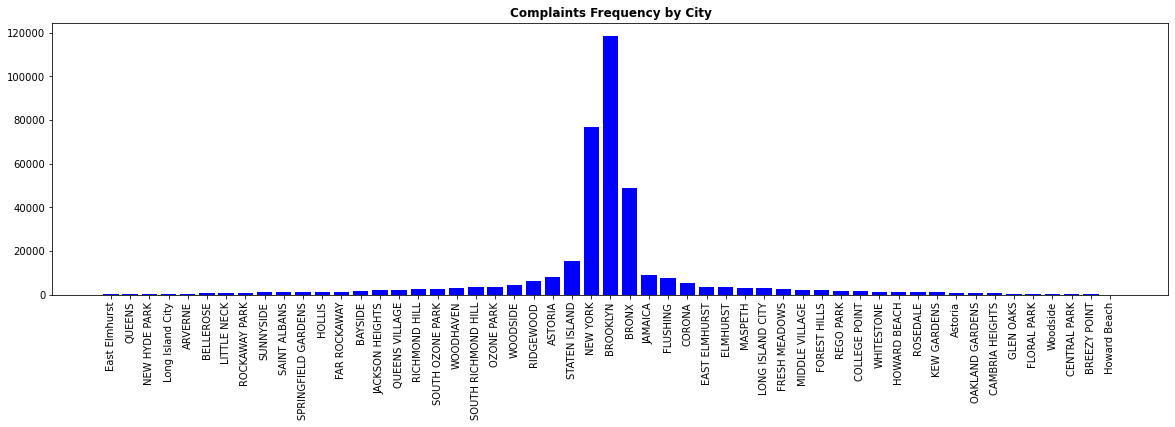

In [9]:
import matplotlib.pyplot as plt
from matplotlib import style, rcParams
%matplotlib inline

#The exercise below is to properly sort the complaints count into a bell_shaped_distribution
complaints_count_dict = dict(df['City'].value_counts())

sorted_array = sorted(list(complaints_count_dict.items()), key = lambda x:x[1], reverse = True)
bell_curved_array = sorted_array[1::2][::-1] + sorted_array[::2]

#re-cast bell_curved_array into a dataframe
df_city = pd.DataFrame(bell_curved_array)

df_city.rename(columns = {0:'City', 1:'Complaint_Frequency'}, inplace = True)

cities = df_city['City'].values
complaint_frequency = df_city['Complaint_Frequency'].values


plt.figure(figsize = (20,5))
plt.xticks(rotation = 90)
plt.bar(cities, complaint_frequency, color = 'Blue')
plt.title('Complaints Frequency by City', fontsize = rcParams['axes.titlesize'], fontweight = 'bold')
plt.show()

## Scatter and Hexbin plots for complaint concentration across Brooklyn

In [10]:
df_Brooklyn = df.loc[df['City'] == 'BROOKLYN', 
                     ['Complaint Type', 'X Coordinate (State Plane)','Y Coordinate (State Plane)', 'Location']]

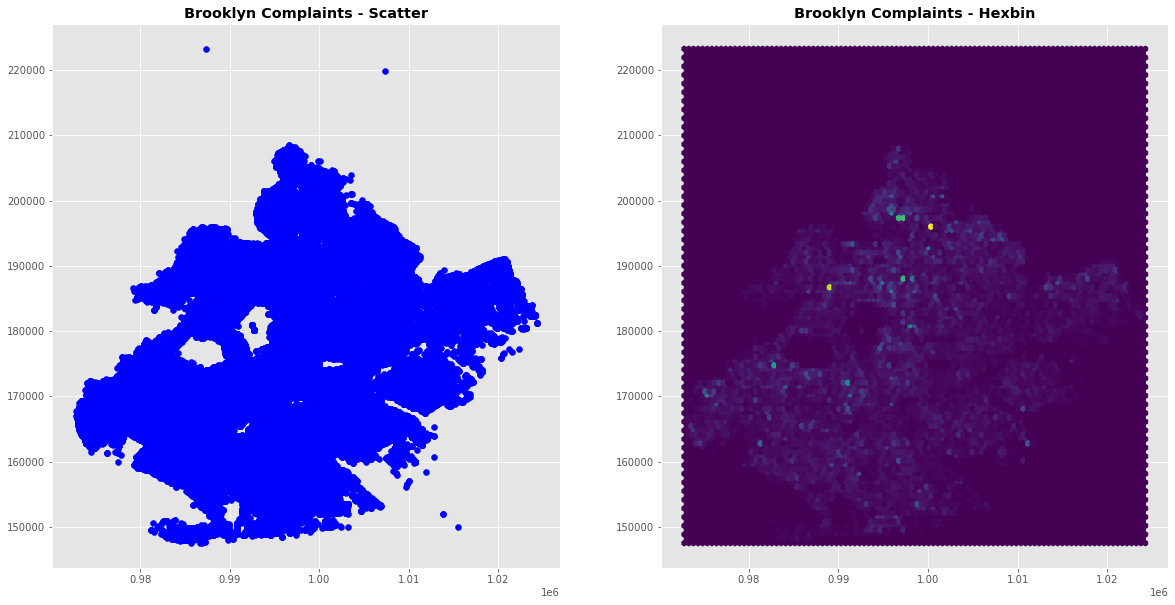

In [11]:
style.use('ggplot')
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace=0.25)
plt.subplot(1,2,1)
plt.title('Brooklyn Complaints - Scatter', fontweight = 'bold')
plt.scatter(df_Brooklyn['X Coordinate (State Plane)'], df_Brooklyn['Y Coordinate (State Plane)'], c='Blue')
plt.subplot(1,2,2)
plt.title('Brooklyn Complaints - Hexbin', fontweight = 'bold')
plt.hexbin(df_Brooklyn['X Coordinate (State Plane)'], df_Brooklyn['Y Coordinate (State Plane)'])

## Plot a bar graph of count vs. complaints type

<BarContainer object of 21 artists>

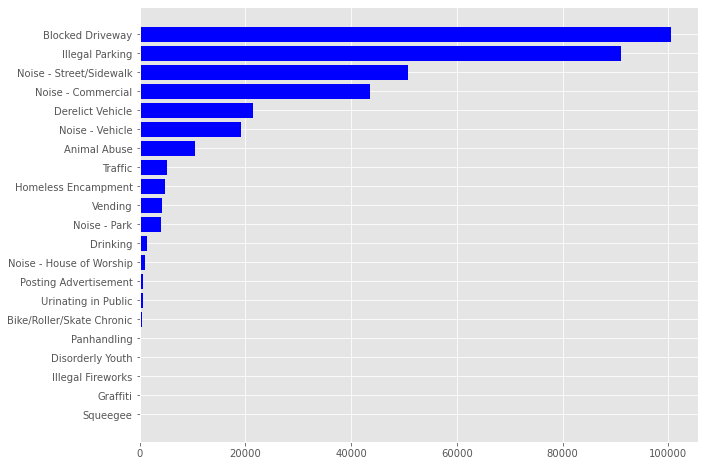

In [12]:
#Plotting a bar graph of complaints type and count. Here horizontal bar chart helps in better visualization

complaints_count_dict = dict(df['Complaint Type'].value_counts())

sorted_array = sorted(list(complaints_count_dict.items()), key = lambda x:x[1])

df_complaints_count = pd.DataFrame(sorted_array)

df_complaints_count.rename(columns = {0:'Complaint Type', 1:'Complaint_Frequency'}, inplace = True)

plt.figure(figsize = (10,8))
plt.barh(df_complaints_count['Complaint Type'], df_complaints_count['Complaint_Frequency'], color = 'Blue')

## Top 10 types of complaints

In [13]:
#Top 10 types of complaints

sorted_array = sorted(list(complaints_count_dict.items()), key = lambda x:x[1], reverse=True)

df_complaints_count = pd.DataFrame(sorted_array)

df_complaints_count.rename(columns = {0:'Complaint Type', 1:'Complaint Frequency'}, inplace = True)

print("Top 10 types of complaints")
df_complaints_count['Complaint Type'].iloc[:10]

Top 10 types of complaints


0           Blocked Driveway
1            Illegal Parking
2    Noise - Street/Sidewalk
3         Noise - Commercial
4           Derelict Vehicle
5            Noise - Vehicle
6               Animal Abuse
7                    Traffic
8        Homeless Encampment
9                    Vending
Name: Complaint Type, dtype: object

## Display the types of complaints in each city in a separate dataset

In [14]:
# Preparing data for providing complaints type by city

# 1 Deleting the rows where complaints type is not in top 10
df.drop(df.loc[df['Complaint Type']=='Squeegee'].index, inplace=True)
df.drop(df.loc[df['Complaint Type']=='Graffiti'].index, inplace=True)
df.drop(df.loc[df['Complaint Type']=='Illegal Fireworks'].index, inplace=True)
df.drop(df.loc[df['Complaint Type']=='Disorderly Youth'].index, inplace=True)
df.drop(df.loc[df['Complaint Type']=='Panhandling'].index, inplace=True)
df.drop(df.loc[df['Complaint Type']=='Bike/Roller/Skate Chronic'].index, inplace=True)
df.drop(df.loc[df['Complaint Type']=='Urinating in Public'].index, inplace=True)
df.drop(df.loc[df['Complaint Type']=='Posting Advertisement'].index, inplace=True)
df.drop(df.loc[df['Complaint Type']=='Noise - House of Worship'].index, inplace=True)
df.drop(df.loc[df['Complaint Type']=='Drinking'].index, inplace=True)
df.drop(df.loc[df['Complaint Type']=='Noise - Park'].index, inplace=True)

In [15]:
df_city_complaints = df[['City', 'Complaint Type', 'Unique Key']]

In [16]:
#Display the types of complaints in each city
df_pivot = pd.pivot_table(df_city_complaints, values='Unique Key', index='City', columns='Complaint Type',
                          aggfunc='count')
df_pivot.fillna(0, inplace=True)

In [17]:
df_pivot

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Homeless Encampment,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk,Noise - Vehicle,Traffic,Vending
City,,,,,,,,,,
ARVERNE,46.0,50.0,32.0,4.0,62.0,2.0,29.0,9.0,1.0,1.0
ASTORIA,170.0,3436.0,426.0,32.0,1337.0,1640.0,408.0,236.0,60.0,57.0
Astoria,0.0,159.0,14.0,0.0,277.0,310.0,145.0,0.0,0.0,0.0
BAYSIDE,53.0,514.0,231.0,2.0,637.0,47.0,17.0,24.0,9.0,2.0
BELLEROSE,15.0,138.0,120.0,1.0,132.0,38.0,13.0,11.0,9.0,0.0
BREEZY POINT,2.0,3.0,3.0,0.0,16.0,4.0,1.0,1.0,0.0,0.0
BRONX,1967.0,17052.0,2399.0,274.0,9857.0,2941.0,9118.0,3545.0,426.0,431.0
BROOKLYN,3186.0,36431.0,6245.0,939.0,33461.0,13848.0,13944.0,5933.0,1253.0,575.0
CAMBRIA HEIGHTS,15.0,177.0,148.0,6.0,113.0,19.0,29.0,100.0,7.0,0.0


## Visualize Major Types of Complaints in Each City

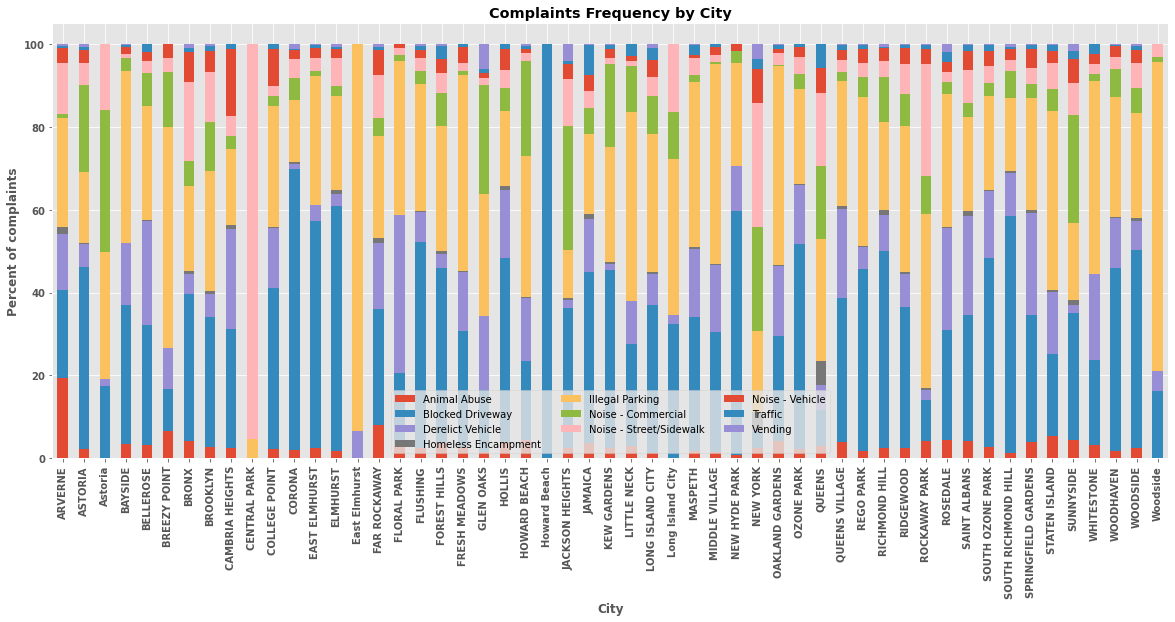

In [18]:
#Visualize Major Types of Complaints in Each City
stacked_df = df_pivot.apply(lambda x: x*100/sum(x), axis=1)
stacked_df.plot(kind="bar", stacked=True, figsize = (20, 8))
plt.title('Complaints Frequency by City', fontsize = rcParams['axes.titlesize'], fontweight = 'bold')
plt.legend(loc = 'lower center', ncol=3)
plt.ylabel("Percent of complaints", fontweight='bold')
plt.xlabel("City", fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.show()

## Average response time across various types of complaints

In [19]:
df_complaint_response_time = df[['Complaint Type', 'Created Date', 'Closed Date']]
df_complaint_response_time.loc[:, 'Created Date'] = pd.to_datetime(df['Created Date'])
df_complaint_response_time.loc[:, 'Closed Date'] = pd.to_datetime(df['Closed Date'])
df_complaint_response_time.loc[:, 'Response Time'] = df_complaint_response_time['Closed Date'] - df_complaint_response_time['Created Date']

C:\Users\akans\AppData\Local\Temp\ipykernel_32700\588978059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complaint_response_time.loc[:, 'Created Date'] = pd.to_datetime(df['Created Date'])
C:\Users\akans\AppData\Local\Temp\ipykernel_32700\588978059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complaint_response_time.loc[:, 'Closed Date'] = pd.to_datetime(df['Closed Date'])
C:\Users\akans\AppData\Local\Temp\ipykernel_32700\588978059.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [20]:
df_crt = pd.pivot_table(df_complaint_response_time, values = 'Response Time', index='Complaint Type', 
                        aggfunc={'Response Time' : np.mean})
df_crt

,Response Time
Complaint Type,
Animal Abuse,0 days 05:00:51.110920689
Blocked Driveway,0 days 04:30:17.836126258
Derelict Vehicle,0 days 07:01:20.379007793
Homeless Encampment,0 days 04:17:56.064195485
Illegal Parking,0 days 04:19:44.167962060
Noise - Commercial,0 days 03:04:01.750693346
Noise - Street/Sidewalk,0 days 03:23:38.645885826
Noise - Vehicle,0 days 03:29:46.409777777
Traffic,0 days 03:25:15.127927230
